### WDNN model

pass the requirement for n=9,12,15,18,24

Run multiple times with error bar possible

In [69]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

# Set a global seed for reproducibility
def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def lr_scheduler(epoch, lr):
    initial_lr = 0.001  # This should match your initial learning rate in the optimizer
    if epoch > 50:
        return lr * 0.5  # Keep half of the initial learning rate
    return initial_lr

def run_wide_and_deep_model(n,seed):
    # Load dataset
    X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
    y = np.load(f'Datasets/kryptonite-{n}-y.npy')
    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Define the input for both wide and deep parts
    input_layer = Input(shape=(X_train_scaled.shape[1],), name="input_layer")

    # Wide part: Linear layer
    wide_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    wide_part = BatchNormalization()(wide_part)

    # Deep part: Multi-layer perceptron
    deep_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)

    # Concatenate wide and deep parts
    combined = Concatenate()([wide_part, deep_part])

    # Output layer
    output = Dense(1, activation="sigmoid")(combined)

    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks for early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    lr_callback = LearningRateScheduler(lr_scheduler)

    # Train the model
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping, lr_callback],
        verbose=1,
    )

    # Save the trained model
    model.save(f"models/model_kryptonite_{n}_{seed}.keras")
    print(f"Model saved")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy


# Example usage for specific n values
possible_n_vals = [9, 12, 15, 18]  # Test on n=24 or other values
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n in possible_n_vals:
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = run_wide_and_deep_model(n, seed)
        acc_list[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={possible_n_vals[idx]}")


Testing with n=9 and SEED=40
Epoch 1/100
113/113 [==============================] - 3s 8ms/step - loss: 0.9757 - accuracy: 0.5682 - val_loss: 0.9310 - val_accuracy: 0.5941 - lr: 0.0010
Epoch 2/100
113/113 [==============================] - 1s 6ms/step - loss: 0.7846 - accuracy: 0.7776 - val_loss: 0.8083 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 3/100
113/113 [==============================] - 1s 7ms/step - loss: 0.5968 - accuracy: 0.9022 - val_loss: 0.6012 - val_accuracy: 0.9394 - lr: 0.0010
Epoch 4/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4678 - accuracy: 0.9326 - val_loss: 0.4313 - val_accuracy: 0.9565 - lr: 0.0010
Epoch 5/100
113/113 [==============================] - 1s 6ms/step - loss: 0.4040 - accuracy: 0.9379 - val_loss: 0.3723 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 6/100
113/113 [==============================] - 1s 6ms/step - loss: 0.3687 - accuracy: 0.9451 - val_loss: 0.3395 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 7/100
113/113 [==============

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2

def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def lr_scheduler(epoch, lr):
    initial_lr = 0.0005  # This should match your initial learning rate in the optimizer
    if epoch > 50:
        return initial_lr * 0.5  # Keep half of the initial learning rate
    return initial_lr

def run_wide_and_deep_model(n, seed):
    # Load dataset
    X = np.load(f'Datasets/additional-kryptonite-{n}-X.npy') 
    y = np.load(f'Datasets/additional-kryptonite-{n}-y.npy')

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Define the input for both wide and deep parts
    input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

    # Wide part: Linear layer
    wide_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    wide_part = BatchNormalization()(wide_part)

    # Deep part: Multi-layer perceptron
    deep_part = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(128, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)
    deep_part = Dropout(0.2)(deep_part)
    deep_part = Dense(64, activation="relu", kernel_regularizer=l2(0.001))(deep_part)
    deep_part = BatchNormalization()(deep_part)

    # Concatenate wide and deep parts
    combined = Concatenate()([wide_part, deep_part])

    # Output layer
    output = Dense(1, activation="sigmoid")(combined)

    # Define the model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])

    # Callbacks for early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    lr_callback = LearningRateScheduler(lr_scheduler)

    # Train the model
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val_scaled, y_val),
        callbacks=[early_stopping, lr_callback],
        verbose=1,
    )

    # Save the trained model
    model.save(f"models/model_kryptonite_{n}_{seed}.keras")
    print(f"Model saved")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy

# Example usage for specific n values
possible_n_vals = [24]  # Test on n=24 or other values
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n in possible_n_vals:
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = run_wide_and_deep_model(n, seed)
        acc_list[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={possible_n_vals[idx]}")

Testing with n=24 and SEED=40
Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9603 - accuracy: 0.5018 - val_loss: 0.8590 - val_accuracy: 0.5013 - lr: 5.0000e-04
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7990 - accuracy: 0.5120 - val_loss: 0.7599 - val_accuracy: 0.5005 - lr: 5.0000e-04
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7347 - accuracy: 0.5155 - val_loss: 0.7272 - val_accuracy: 0.5008 - lr: 5.0000e-04
Epoch 4/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7131 - accuracy: 0.5173 - val_loss: 0.7139 - val_accuracy: 0.5026 - lr: 5.0000e-04
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7061 - accuracy: 0.5202 - val_loss: 0.7085 - val_accuracy: 0.5061 - lr: 5.0000e-04
Epoch 6/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7023 - accuracy: 0.5242 - val_loss: 0.7035 - val_accuracy: 0.5104 - lr: 5.0

### Testing

not finished

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

def set_global_seed(seed_value):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

def testing(n, add, seed):
    if add:
        # Load dataset
        X = np.load(f'Datasets/additional-kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/additional-kryptonite-{n}-y.npy')
    else:
        # Load dataset
        X = np.load(f'Datasets/kryptonite-{n}-X.npy') 
        y = np.load(f'Datasets/kryptonite-{n}-y.npy')

    # Shuffle and split the data
    _, X_temp, _, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
    _, X_test, _, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    model = load_model(f"models/model_kryptonite_{n}_{seed}.keras")

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    #print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy


possible_n_vals = {9:0,12:0,15:0,18:0,24:1}
SEEDS = [40, 42, 44]
acc_list = {seed: [] for seed in SEEDS}  # Initialize dictionary with empty lists for each seed

for seed in SEEDS:
    # Set a global seed for reproducibility
    set_global_seed(seed)
    for n, add in possible_n_vals.items():
        print(f"Testing with n={n} and SEED={seed}")
        accuracy = testing(n, add, seed)
        acc_list[seed].append(accuracy)  # Append accuracy to the corresponding seed's list

# Print the results
for seed, accuracies in acc_list.items():
    for idx, accuracy in enumerate(accuracies):
        print(f"Accuracy achieved for SEED {seed}: {accuracy} with n={list(possible_n_vals.keys())[idx]}")

Testing with n=9 and SEED=40
Testing with n=12 and SEED=40
Testing with n=15 and SEED=40
Testing with n=18 and SEED=40
Testing with n=24 and SEED=40
Testing with n=9 and SEED=42
Testing with n=12 and SEED=42
Testing with n=15 and SEED=42
Testing with n=18 and SEED=42
Testing with n=24 and SEED=42
Testing with n=9 and SEED=44
Testing with n=12 and SEED=44
Testing with n=15 and SEED=44
Testing with n=18 and SEED=44
Testing with n=24 and SEED=44
Accuracy achieved for SEED 40: 0.9612963199615479 with n=9
Accuracy achieved for SEED 40: 0.9604166746139526 with n=12
Accuracy achieved for SEED 40: 0.9536666870117188 with n=15
Accuracy achieved for SEED 40: 0.915925920009613 with n=18
Accuracy achieved for SEED 40: 0.8293733596801758 with n=24
Accuracy achieved for SEED 42: 0.9616666436195374 with n=9
Accuracy achieved for SEED 42: 0.960972249507904 with n=12
Accuracy achieved for SEED 42: 0.9478889107704163 with n=15
Accuracy achieved for SEED 42: 0.9004629850387573 with n=18
Accuracy achieved

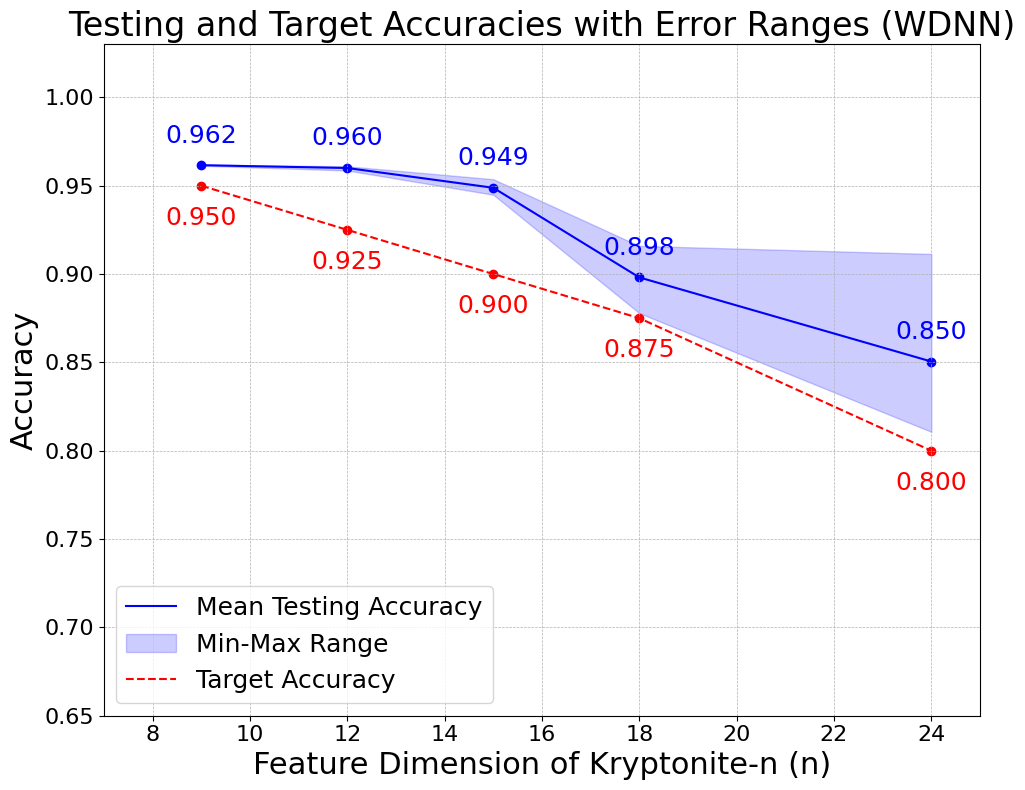

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data setup for seeds and accuracy results
n = [9, 12, 15, 18, 24]
seeds = [40, 42, 44]

succ = [0.95, 0.925, 0.9, 0.875, 0.8]  # Target accuracies

# Calculate mean, min, and max for error bars
acc_values = np.array([acc_list[seed] for seed in seeds])  # Shape: (len(seeds), len(n))
means = np.mean(acc_values, axis=0)
mins = np.min(acc_values, axis=0)
maxs = np.max(acc_values, axis=0)

# Plot style
plt.figure(figsize=(10, 8))
plt.style.use('default')
plt.grid(visible=True, which="both", linestyle='--', linewidth=0.5)

# Plot lines and scatter points for mean accuracies
plt.plot(n, means, color='blue', label="Mean Testing Accuracy")
plt.scatter(n, means, color='blue')

# Add error bars
plt.fill_between(n, mins, maxs, color='blue', alpha=0.2, label="Min-Max Range")

# Plot target accuracies
plt.plot(n, succ, color='red', linestyle='--', label="Target Accuracy")
plt.scatter(n, succ, color='red')

# Add annotations for mean accuracies
for x, y in zip(n, means):
    plt.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=18, color='blue')

for x, y in zip(n, succ):
    plt.text(x, y - 0.025, f'{y:.3f}', ha='center', va='bottom', fontsize=18, color='red')

# Add legend
plt.legend(fontsize=18, loc="lower left")

# Adjust layout
plt.ylim((0.65, 1.03))
plt.xlim((7, 25))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Feature Dimension of Kryptonite-n (n)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Testing and Target Accuracies with Error Ranges (WDNN)", fontsize=24)
plt.tight_layout()

# Save the plot instead of showing it
plt.savefig("Testing accuracy of WDNN.pdf")
plt.show()
plt.close()


### Inference to unknown data

In [19]:
import numpy as np

# Load the .npy file
file_path = f'Datasets/kryptonite-9-y.npy'  # Replace with your actual file path
data = np.load(file_path)

# Display all elements
np.set_printoptions(threshold=np.inf)  # No limit on displayed elements
print("Data in the .npy file:")
print(data)

# Optionally display additional details
print("\nShape of the data:", data.shape)
print("Data type of the elements:", data.dtype)


Data in the .npy file:
[1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 1

### Testing inference code

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

def inference_and_save_labels(n, input_file, output_file):
    # Load the trained model
    model_path = f"models/model_kryptonite_{n}_{42}.keras"
    print(f"Loading model from {model_path}")
    model = load_model(model_path)

    # Load and standardize the input data
    X_input = np.load(input_file)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_input)  # Standardize the input data
    
    # Perform inference
    print(f"Performing inference on data: {input_file}")
    y_pred = model.predict(X_scaled)

    # Convert predictions to binary labels (assuming a threshold of 0.5 for binary classification)
    y_labels = (y_pred > 0.5).astype(int).flatten()
    y_labels = y_labels.astype(np.int64)

    # Save the predicted labels to a `.npy` file
    print(f"Saving predicted labels to {output_file}")
    np.save(output_file, y_labels)
    print("Inference and saving completed.")

# Example usage
n = 9  # Feature dimension
input_file = f"Datasets/kryptonite-{n}-X.npy"  
output_file = f"Datasets/testing-WDNN-kryptonite-{n}-y.npy"

inference_and_save_labels(n, input_file, output_file)

data = np.load(output_file)

# Display all elements
np.set_printoptions(threshold=np.inf)  # No limit on displayed elements
print("Data in the .npy file:")
print(data)

# Optionally display additional details
print("\nShape of the data:", data.shape)
print("Data type of the elements:", data.dtype)

Loading model from models/model_kryptonite_9_42.keras
Performing inference on data: Datasets/kryptonite-9-X.npy
563/563 [==============================] - 1s 991us/step
Saving predicted labels to Datasets/testing-WDNN-kryptonite-9-y.npy
Inference and saving completed.
Data in the .npy file:
[1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 

### Inference to hidden data

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

def inference_and_save_labels(n, input_file, output_file):
    # Load the trained model
    model_path = f"models/model_kryptonite_{n}_{42}.keras"
    print(f"Loading model from {model_path}")
    model = load_model(model_path)

    # Load and standardize the input data
    X_input = np.load(input_file)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_input)  # Standardize the input data
    
    # Perform inference
    print(f"Performing inference on data: {input_file}")
    y_pred = model.predict(X_scaled)

    # Convert predictions to binary labels (assuming a threshold of 0.5 for binary classification)
    y_labels = (y_pred > 0.5).astype(int).flatten()
    y_labels = y_labels.astype(np.int64)

    # Save the predicted labels to a `.npy` file
    print(f"Saving predicted labels to {output_file}")
    np.save(output_file, y_labels)
    print("Inference and saving completed.")


n_list = [9,12,15,18,24]

for n in n_list:
    input_file = f"Datasets/hidden-kryptonite-{n}-X.npy"  
    output_file = f"hiddenlabels/WDNN-hidden-kryptonite-{n}-y.npy"

    inference_and_save_labels(n, input_file, output_file)

Loading model from models/model_kryptonite_9_42.keras
Performing inference on data: Datasets/hidden-kryptonite-9-X.npy
313/313 [==============================] - 0s 856us/step
Saving predicted labels to hiddenlabels/WDNN-hidden-kryptonite-9-y.npy
Inference and saving completed.
Loading model from models/model_kryptonite_12_42.keras
Performing inference on data: Datasets/hidden-kryptonite-12-X.npy
313/313 [==============================] - 0s 864us/step
Saving predicted labels to hiddenlabels/WDNN-hidden-kryptonite-12-y.npy
Inference and saving completed.
Loading model from models/model_kryptonite_15_42.keras
Performing inference on data: Datasets/hidden-kryptonite-15-X.npy
313/313 [==============================] - 0s 938us/step
Saving predicted labels to hiddenlabels/WDNN-hidden-kryptonite-15-y.npy
Inference and saving completed.
Loading model from models/model_kryptonite_18_42.keras
Performing inference on data: Datasets/hidden-kryptonite-18-X.npy
313/313 [===========================

### Material from the paper (Teacher Given)

In [3]:
n_values = [9,12,15]

p_values = [1,2,3,4,5,6,7]

presolved_acc_by_n = [[0.5033918128654971, 0.516140350877193, 0.5139181286549708, 0.5250292397660818, 0.5383625730994152, 0.5638596491228071, 0.5913450292397661], 
                      [0.5016666666666667, 0.496875, 0.5058333333333334, 0.5108333333333334, 0.51375, 0.5241666666666667, 0.5333333333333333],
                     [0.49773333333333336, 0.5005333333333334, 0.504, 0.4978666666666667, 0.5038666666666667, 0.5157333333333334, 0.5241666666666667]]

presolved_feat_by_n = [[10, 55, 220, 715, 2002, 5005, 11440], 
                       [13, 91, 455, 1820, 6188, 18564, 50388],
                       [16, 136, 816, 3876, 15504, 54264, 170544]]


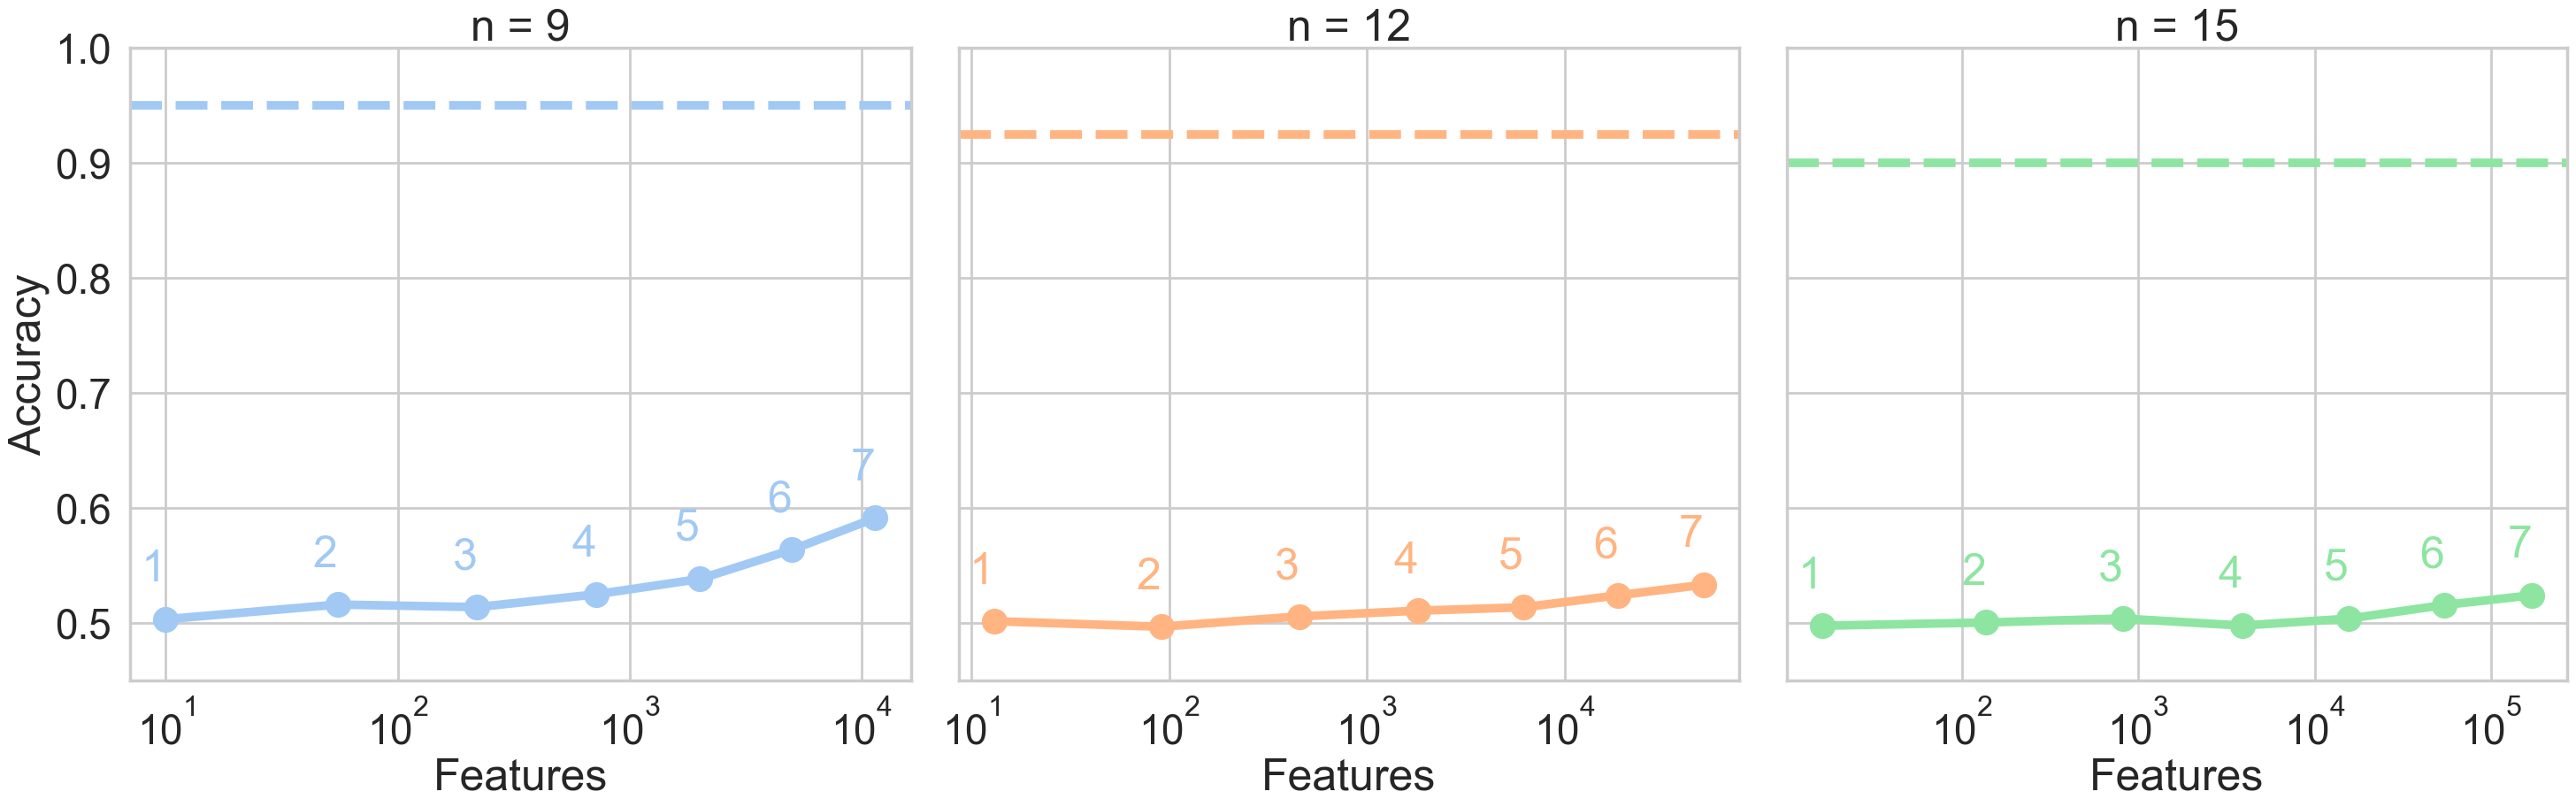

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
n_values = [9, 12, 15]
p_values = [1, 2, 3, 4, 5, 6, 7]

# Plot style
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1.5)
colors = sns.color_palette("pastel", 3)  # Pastel color palette

success_hlines = [0.95, 0.925, 0.9]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharey=True)

# Plot each n-value in its own subplot
for i, (n, ax) in enumerate(zip(n_values, axes)):
    ax.plot(presolved_feat_by_n[i], presolved_acc_by_n[i], marker='o', label=f'n = {n}', color=colors[i],
           lw=7, markersize=20)
    
    # Annotating with p-values in the same color as the line
    for j, (x, y) in enumerate(zip(presolved_feat_by_n[i], presolved_acc_by_n[i])):
        ax.text(x, y+0.025, f'{p_values[j]}',  ha='right', va='bottom', color=colors[i])
    
    ax.axhline(success_hlines[i], color=colors[i], linestyle='--', lw=7)
    # Customizing each subplot
    ax.set_title(f'n = {n}')
    ax.set_xlabel("Features")
    if i == 0:
        ax.set_ylabel("Accuracy")
    ax.set_xscale('log')
    
# Adjust layout
plt.tight_layout()
plt.ylim((0.45, 1.0))

# Show the plot
plt.show()

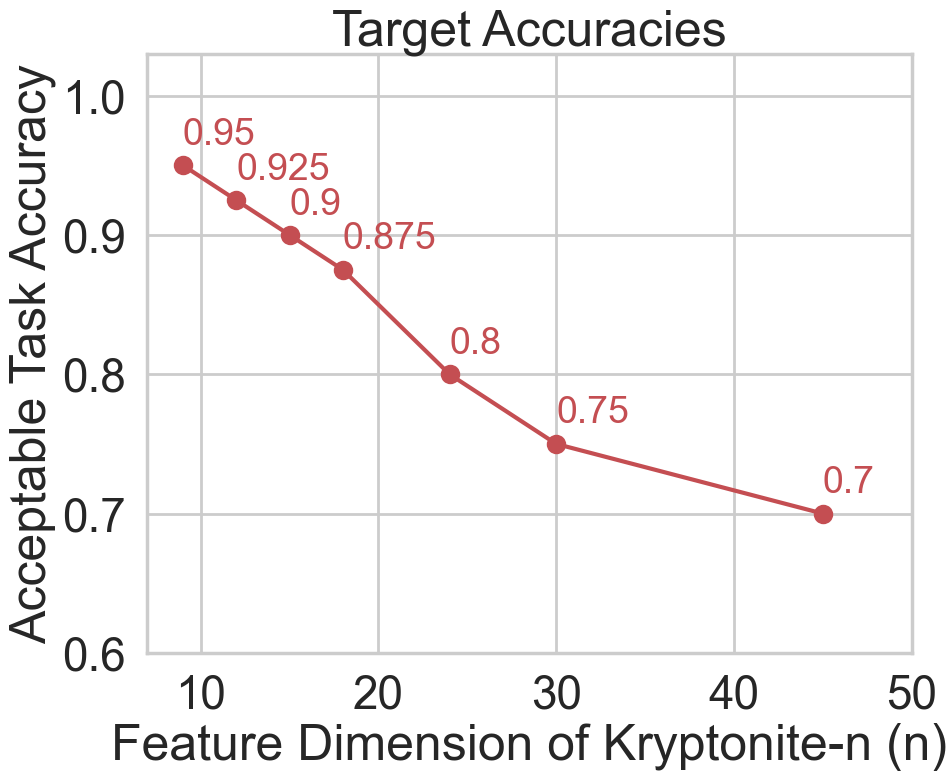

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data

# Plot style
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=1.5)
plt.figure(figsize=(10,8))

n = [9,12,15,18,24,30,45]
succ = [0.95, 0.925, 0.9, 0.875, 0.8, 0.75, 0.7]
plt.plot(n, succ, c='r')
plt.scatter(x=n, y=succ, c='r') 

ax = plt.gca()
# Annotating with p-values in the same color as the line
for j, (x, y) in enumerate(zip(n, succ)):
    ax.text(x, y+0.01, f'{succ[j]}',  ha='left', va='bottom', color='r', size=27)
        
# Adjust layout
plt.tight_layout()
plt.ylim((0.6, 1.03))
plt.xlim((7, 50))
# Show the plot

plt.title("Target Accuracies")
plt.ylabel("Acceptable Task Accuracy")
plt.xlabel("Feature Dimension of Kryptonite-n (n)")
plt.show()